In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

In [4]:
from join_data import compile_data, join_y

In [ ]:
import glob
filepaths = get_filepaths('C:\\Users\\Administrator\\expenditure_prox\\desktops\\*','desktops')

In [ ]:
shelf_paths=[path for path in filepaths if 'attributes' not in path]

In [ ]:
df = pd.read_json(shelf_paths[0])
for file in shelf_paths[1:]:
    df = pd.concat([df, pd.read_json(file)]).reset_index().drop('index', axis=1)

## Reading in data and preproc

In [5]:
df = pd.read_json('C:\\Users\\Administrator\\expenditure_prox\\desktops.json')

In [6]:
import preproc
df = preproc.clean_cols(df)
df = join_y(df, 'desktops_sales.csv')

In [7]:
df.head(2)


,product_name,price,urls,remotekey,shelf_order,item_category,no_reviews,recommendation_percent,review_date,review_rating,review_text,review_title,summary_star_rating,code,TOTAL_SALES
0,asus vivo v241 23.8in i5 8gb 1tb 256gb fhd all...,799.99,https://www.argos.co.uk/product/8181639?clickP...,8181639,1,[The space-saving Vivo AiO 24 is remarkably sl...,0,0,[],[],[],[],0.0,3956268223022212459140616052982966273110149562...,93
1,asus vivo v241 24in ryzen 3 8gb 128gb fhd alli...,549.99,https://www.argos.co.uk/product/7955763?clickP...,7955763,2,[The space-saving Vivo AiO V241 is remarkably ...,13,92,"[25 April 2021, 14 April 2021, 7 April 2021, 1...","[5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5]",[Did a lot of research before purchase and rea...,"[sleek look and easy to use, Great machine at ...",4.7,8860716220315163645376610806742422170930139462...,469


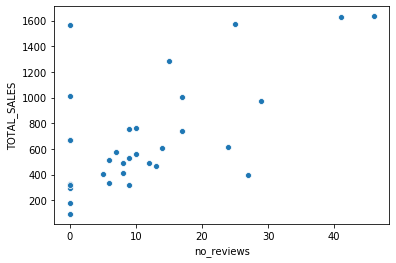

In [11]:
import seaborn as sns
sns.scatterplot(x=df['no_reviews'], y=df['TOTAL_SALES'])

In [ ]:
import re
df['no_reviews'] =  [(re.findall(r'\d+', x[0]))[0]
                         if x!=[''] 
                         else 0 
                         for x in df['no_reviews']]


In [ ]:
df['no_reviews'][0][0]

In [ ]:
re.findall(r'\d+', df['no_reviews'][0][0])[0]

## Visualsing data

In [ ]:
# removing broken last row
dfc = df.iloc[0:60]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
dfc = dfc[['remotekey','price','no_reviews','recommendation_percent','summary_star_rating']]

f, axes = plt.subplots(2, 2)
sns.distplot(dfc['price'],hist=True, ax = axes[0][0])
axes[0][0].set_title('Price')
sns.distplot(dfc['no_reviews'],hist=True, ax = axes[0][1])
axes[0][1].set_title('No_reviews')
sns.distplot(dfc['recommendation_percent'],hist=True, ax = axes[1][0])
axes[1][0].set_title('Recommendation_percent')
sns.distplot(dfc['summary_star_rating'],hist=True, ax = axes[1][1])
axes[1][1].set_title('Summary_star_rating')
            

## Kmeans

In [ ]:
from sklearn.cluster import KMeans
dfn=dfc.drop('remotekey',axis=1).to_numpy()
X=dfn
km = KMeans(
    n_clusters=3, init='random',
    n_init=100, max_iter=1000, 
    tol=1e-06, random_state=1
)
y_km = km.fit_predict(X)
dfc['km_cluster'] = pd.Series(y_km, index=dfc.index)


In [ ]:
kmeans = KMeans(n_init=20, max_iter=1000, n_clusters=4,algorithm='full').fit(X)
k_result = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=k_result, s=40, cmap='viridis')
plt.legend(k_result, loc=4)

In [ ]:
dfc.sort_values('no_reviews', ascending=False)

**The clustering is done primarly from price, desktops less than £1000 = cluster 2
desktops £1000-£2000 = cluster 1, and then more are 0.**

## Visualising weights

In [ ]:
from eigencluster import show_results

show_results(X,4,4)

In [ ]:
dfc.columns

**If my interpretation is correct then the primary component is almost all price, and the secondary component is mainly recommendation percent with a bit of no_reviews.**